# Milo Exploration / Tutorial

Implementing https://pertpy.readthedocs.io/en/latest/tutorials/notebooks/milo.html for our single cell object

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pertpy as pt
import scanpy as sc
import numpy as np
import os

sc.settings.verbosity = 3

os.environ['R_HOME'] = '/home/trc891/.conda/envs/cfn-pertpy/lib/R'

/home/trc891/.conda/envs/cfn-pertpy/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [29]:
pt.__version__

'0.9.4'

In [3]:
DATA_DIR = '../../data/10paper_figures/sc_files'

In [4]:
adata = sc.read_h5ad(f'{DATA_DIR}/00scvi_2025_02_24_v1.h5ad')

In [5]:
adata.obs['Sample'] = adata.obs['Sample'].cat.remove_unused_categories()

In [6]:
adata

AnnData object with n_obs × n_vars = 89601 × 1000
    obs: 'orig.ident', 'Doublet score', 'Library ID', 'Chemistry', 'GEX library Index', 'Step 1 date YYYY/MM/DD', 'Project', 'Class', 'Sample', 'Cell viabiliy', 'Age', 'Sex', 'Race', 'OnModulator', 'Modulator', 'Include', 'Comments', 'n_genes', 'batch', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'pct_counts_ribo', '_scvi_batch', '_scvi_labels', 'leiden', 'leiden_mod', 'leiden_unmerged', 'leiden_final', 'cell_type_annot', 'cell_type_annot_unmerged', 'leiden_orig'
    var: 'gene_ids-0', 'feature_types-0', 'n_cells-0', 'gene_ids-1', 'feature_types-1', 'n_cells-1', 'gene_ids-10', 'feature_types-10', 'n_cells-10', 'gene_ids-11', 'feature_types-11', 'n_cells-11', 'gene_ids-12', 'feature_types-12', 'n_cells-12', 'gene_ids-13', 'feature_types-13', 'n_cells-13', 'gene_ids-14', 'feature_types-14', 'n_cells-14', 'gene_ids-15', 'featur

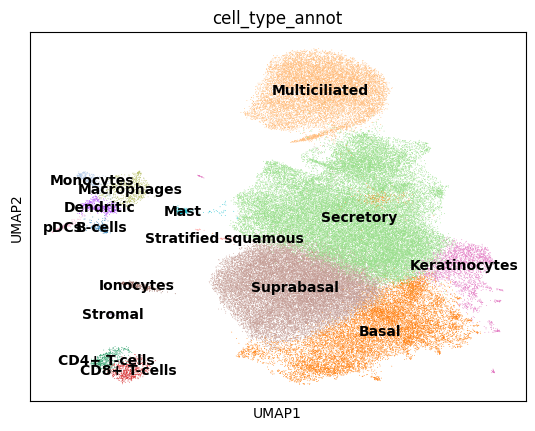

In [7]:
sc.pl.umap(adata, color=['cell_type_annot'], legend_loc='on data')

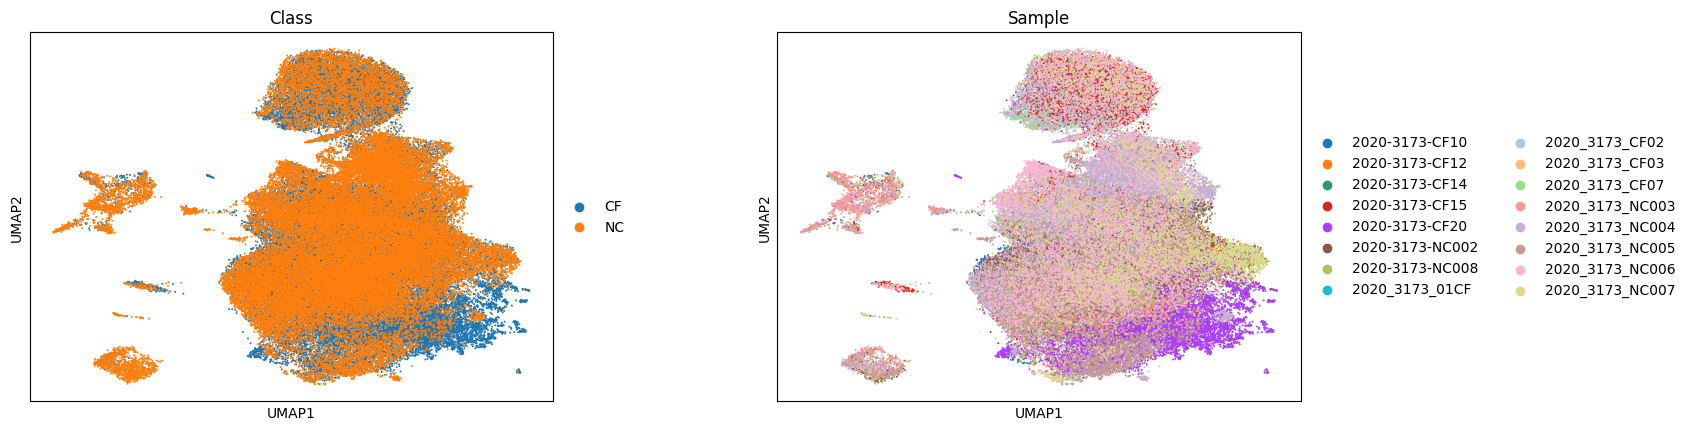

In [8]:
sc.pl.umap(adata, color=["Class", "Sample"], wspace=0.3, size=8)

In [9]:
milo = pt.tl.Milo()
mdata = milo.load(adata)

In [10]:
mdata

MuData object with n_obs × n_vars = 89601 × 1000
  2 modalities
    rna:	89601 x 1000
      obs:	'orig.ident', 'Doublet score', 'Library ID', 'Chemistry', 'GEX library Index', 'Step 1 date YYYY/MM/DD', 'Project', 'Class', 'Sample', 'Cell viabiliy', 'Age', 'Sex', 'Race', 'OnModulator', 'Modulator', 'Include', 'Comments', 'n_genes', 'batch', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'pct_counts_ribo', '_scvi_batch', '_scvi_labels', 'leiden', 'leiden_mod', 'leiden_unmerged', 'leiden_final', 'cell_type_annot', 'cell_type_annot_unmerged', 'leiden_orig'
      var:	'gene_ids-0', 'feature_types-0', 'n_cells-0', 'gene_ids-1', 'feature_types-1', 'n_cells-1', 'gene_ids-10', 'feature_types-10', 'n_cells-10', 'gene_ids-11', 'feature_types-11', 'n_cells-11', 'gene_ids-12', 'feature_types-12', 'n_cells-12', 'gene_ids-13', 'feature_types-13', 'n_cells-13', 'gene_ids-14', 'feature_types-14', 'n_cells-14', 'gene_ids-15', 'feature_types-15', 'n_cells-15', 'gene_ids-16', 'feature_types-16', 'n_cells-16', 'gene_ids-17', 'feature_types-17', 'n_cells-17', 'gene_ids-2', 'feature_types-2', 'n_cells-2', 'gene_ids-3', 'feature_types-3', 'n_cells-3', 'gene_ids-4', 'feature_types-4', 'n_cells-4', 'gene_ids-5', 'feature_types-5', 'n_cells-5', 'gene_ids-6', 'feature_types-6', 'n_cells-6', 'gene_ids-7', 'feature_types-7', 'n_cells-7', 'gene_ids-8', 'feature_types-8', 'n_cells-8', 'gene_ids-9', 'feature_types-9', 'n_cells-9', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches', 'mito', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
      uns:	'Class_colors', 'Library ID_colors', 'Sample_colors', 'Sex_colors', '_scvi_manager_uuid', '_scvi_uuid', 'cell_type_annot_colors', 'hvg', 'leiden', 'leiden_colors', 'leiden_final_colors', 'leiden_mod_colors', 'leiden_unmerged_colors', 'neighbors', 'umap'
      obsm:	'X_scVI', 'X_umap'
      layers:	'counts'
      obsp:	'connectivities', 'distances'
    milo:	0 x 0

In [11]:
sc.pp.neighbors(mdata['rna'], use_rep='X_scVI', n_neighbors=150, n_pcs=10)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:02:31)


In [12]:
milo.make_nhoods(mdata["rna"], prop=0.1)

In [13]:
mdata["rna"].obsm["nhoods"]

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 1999813 stored elements and shape (89601, 7146)>

In [14]:
mdata["rna"][mdata["rna"].obs["nhood_ixs_refined"] != 0].obs[["nhood_ixs_refined", "nhood_kth_distance"]]

,nhood_ixs_refined,nhood_kth_distance
SC178_AAACCTGGTGAGGCTA-1-0,1,0.808926
SC178_AAACCTGGTGAGGGTT-1-0,1,1.012756
SC178_AAACGGGAGCTGCAAG-1-0,1,1.186003
SC178_AAAGCAACAATTCCTT-1-0,1,0.960899
SC178_AAAGCAAGTCCAACTA-1-0,1,0.841978
...,...,...
SC185_TTGTAGGGTCTAAACC-1-17,1,1.103488
SC185_TTTACTGCAACGCACC-1-17,1,1.149528
SC185_TTTACTGTCACCTTAT-1-17,1,1.167676
SC185_TTTATGCTCCCTCTTT-1-17,1,1.385233


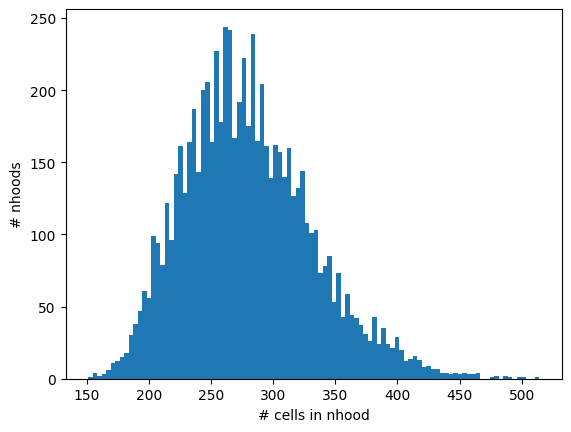

In [15]:
nhood_size = np.array(mdata["rna"].obsm["nhoods"].sum(0)).ravel()
plt.hist(nhood_size, bins=100)
plt.xlabel("# cells in nhood")
plt.ylabel("# nhoods");

In [16]:
mdata = milo.count_nhoods(mdata, sample_col="Sample")

In [17]:
mdata

MuData object with n_obs × n_vars = 89601 × 1000
  2 modalities
    rna:	89601 x 1000
      obs:	'orig.ident', 'Doublet score', 'Library ID', 'Chemistry', 'GEX library Index', 'Step 1 date YYYY/MM/DD', 'Project', 'Class', 'Sample', 'Cell viabiliy', 'Age', 'Sex', 'Race', 'OnModulator', 'Modulator', 'Include', 'Comments', 'n_genes', 'batch', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'pct_counts_ribo', '_scvi_batch', '_scvi_labels', 'leiden', 'leiden_mod', 'leiden_unmerged', 'leiden_final', 'cell_type_annot', 'cell_type_annot_unmerged', 'leiden_orig', 'nhood_ixs_random', 'nhood_ixs_refined', 'nhood_kth_distance'
      var:	'gene_ids-0', 'feature_types-0', 'n_cells-0', 'gene_ids-1', 'feature_types-1', 'n_cells-1', 'gene_ids-10', 'feature_types-10', 'n_cells-10', 'gene_ids-11', 'feature_types-11', 'n_cells-11', 'gene_ids-12', 'feature_types-12', 'n_cells-12', 'gene_ids-13', 'feature_types-13', 'n_cells-13', 'gene_ids-14', 'feature_types-14', 'n_cells-14', 'gene_ids-15', 'feature_types-15', 'n_cells-15', 'gene_ids-16', 'feature_types-16', 'n_cells-16', 'gene_ids-17', 'feature_types-17', 'n_cells-17', 'gene_ids-2', 'feature_types-2', 'n_cells-2', 'gene_ids-3', 'feature_types-3', 'n_cells-3', 'gene_ids-4', 'feature_types-4', 'n_cells-4', 'gene_ids-5', 'feature_types-5', 'n_cells-5', 'gene_ids-6', 'feature_types-6', 'n_cells-6', 'gene_ids-7', 'feature_types-7', 'n_cells-7', 'gene_ids-8', 'feature_types-8', 'n_cells-8', 'gene_ids-9', 'feature_types-9', 'n_cells-9', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches', 'mito', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
      uns:	'Class_colors', 'Library ID_colors', 'Sample_colors', 'Sex_colors', '_scvi_manager_uuid', '_scvi_uuid', 'cell_type_annot_colors', 'hvg', 'leiden', 'leiden_colors', 'leiden_final_colors', 'leiden_mod_colors', 'leiden_unmerged_colors', 'neighbors', 'umap', 'nhood_neighbors_key'
      obsm:	'X_scVI', 'X_umap', 'nhoods'
      layers:	'counts'
      obsp:	'connectivities', 'distances'
    milo:	16 x 7146
      var:	'index_cell', 'kth_distance'
      uns:	'sample_col'

In [18]:
mdata['milo']

AnnData object with n_obs × n_vars = 16 × 7146
    var: 'index_cell', 'kth_distance'
    uns: 'sample_col'

In [19]:
mdata['rna'].obs['Class'].unique()

['CF', 'NC']
Categories (2, object): ['CF', 'NC']

In [20]:
mdata["rna"].obs["Class"] = mdata["rna"].obs["Class"].cat.reorder_categories(["CF", "NC"])
milo.da_nhoods(mdata, design="~Class")

In [21]:
mdata['milo'].var

,index_cell,kth_distance,logFC,logCPM,F,PValue,FDR,SpatialFDR
0,SC178_AAACCTGGTGAGGCTA-1-0,0.808926,-1.140143,7.434333,1.387166,0.247832,0.707964,0.673056
1,SC178_AAACCTGGTGAGGGTT-1-0,1.012756,0.719578,7.284913,0.653615,0.424973,0.804036,0.766029
2,SC178_AAACGGGAGCTGCAAG-1-0,1.186003,-0.193637,6.771280,0.045119,0.833174,0.964817,0.954976
3,SC178_AAAGCAACAATTCCTT-1-0,0.960899,-0.167148,7.048350,0.049653,0.825127,0.964817,0.954589
4,SC178_AAAGCAAGTCCAACTA-1-0,0.841978,-0.412240,7.404494,0.260214,0.613580,0.896594,0.871704
...,...,...,...,...,...,...,...,...
7141,SC185_TTGTAGGGTCTAAACC-1-17,1.103488,0.755089,7.197044,0.749031,0.393420,0.786824,0.747085
7142,SC185_TTTACTGCAACGCACC-1-17,1.149528,1.534123,7.801556,1.590985,0.216578,0.696180,0.663883
7143,SC185_TTTACTGTCACCTTAT-1-17,1.167676,1.204073,8.228572,0.564610,0.458066,0.821414,0.786152
7144,SC185_TTTATGCTCCCTCTTT-1-17,1.385233,0.446873,7.681767,0.109546,0.742884,0.938674,0.923758


In [28]:
np.min(mdata['milo'].var['SpatialFDR'])

0.21393122307142648

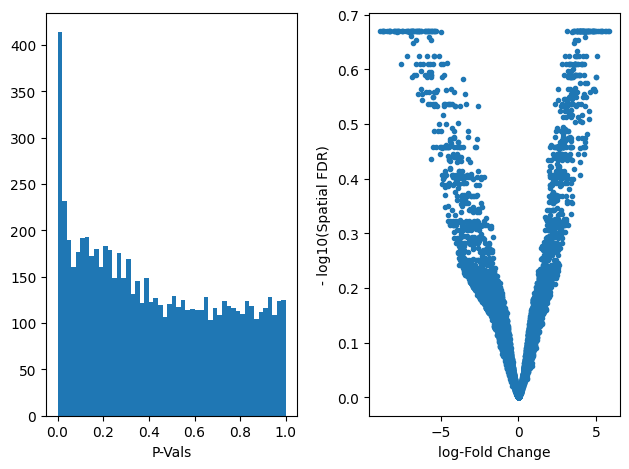

In [22]:
plt.subplot(1, 2, 1)
plt.hist(mdata["milo"].var.PValue, bins=50)
plt.xlabel("P-Vals")
plt.subplot(1, 2, 2)
plt.plot(mdata["milo"].var.logFC, -np.log10(mdata["milo"].var.SpatialFDR), ".")
plt.xlabel("log-Fold Change")
plt.ylabel("- log10(Spatial FDR)")
plt.tight_layout()

In [23]:
milo.build_nhood_graph(mdata)

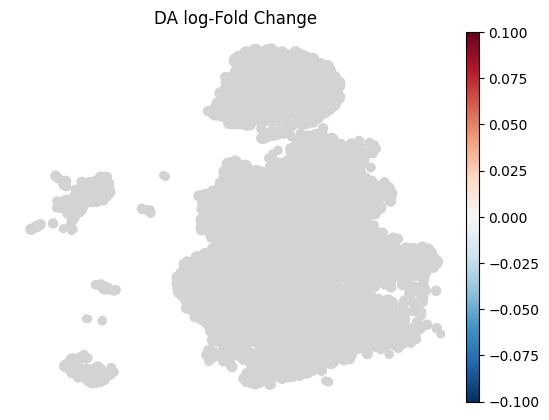

In [24]:
milo.plot_nhood_graph(
    mdata,
    alpha=0.1,  ## SpatialFDR level (1%)
    min_size=1,  ## Size of smallest dot
)

In [25]:
milo.annotate_nhoods(mdata, anno_col="cell_type_annot")

Text(0.5, 0, 'celltype fraction')

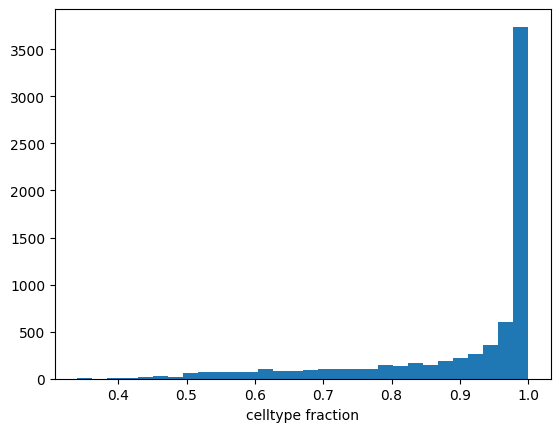

In [26]:
plt.hist(mdata["milo"].var["nhood_annotation_frac"], bins=30)
plt.xlabel("celltype fraction")

/home/trc891/.conda/envs/cfn-pertpy/lib/python3.12/site-packages/pertpy/tools/_milo.py:962: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.stripplot(


<Axes: xlabel='logFC', ylabel='nhood_annotation'>

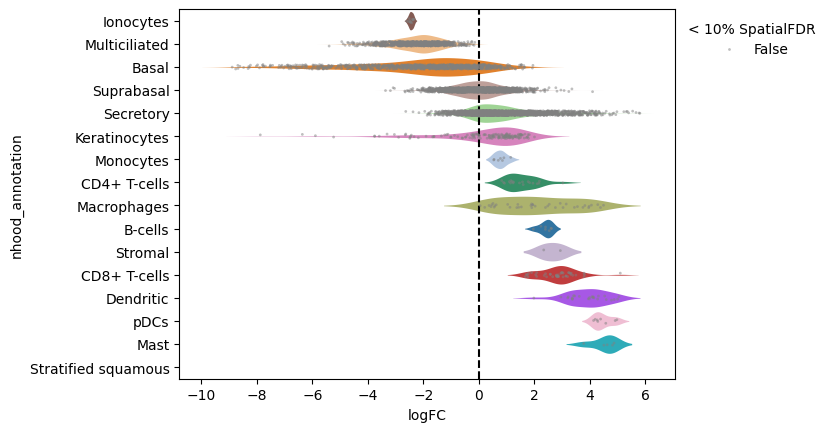

In [27]:
milo.plot_da_beeswarm(mdata, alpha=0.1)